In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/sample_data/CreditDataJPMorgan.csv')

In [4]:
print("First 5 rows of the data:")
print(df.head())

First 5 rows of the data:
   credit_score  annual_income  age  employment_years  debt_ratio  \
0         729.0      118769.39   23               NaN      0.3188   
1           NaN       56719.17   46               NaN      0.1646   
2         744.0       34837.74   38               NaN      0.0907   
3         832.0      120088.04   36               8.0      0.3044   
4         656.0       56580.04   49               8.0      0.2294   

   loan_amount  property_value  monthly_expenses marital_status property_type  \
0     30434.54       129876.89           2312.29         Single     Apartment   
1     12362.16        47440.30               NaN        Married         House   
2     25163.51       187685.12               NaN         Single     Apartment   
3     80698.16        84470.09           2510.77         Single         House   
4     80526.61       111199.52               NaN       Divorced         House   

   children home_ownership previous_credit_status  loan_status  
0      

In [5]:
print("\nData info:")
print(df.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   credit_score            120223 non-null  float64
 1   annual_income           150000 non-null  float64
 2   age                     150000 non-null  int64  
 3   employment_years        119962 non-null  float64
 4   debt_ratio              150000 non-null  float64
 5   loan_amount             150000 non-null  float64
 6   property_value          150000 non-null  float64
 7   monthly_expenses        119768 non-null  float64
 8   marital_status          119784 non-null  object 
 9   property_type           150000 non-null  object 
 10  children                120177 non-null  float64
 11  home_ownership          150000 non-null  object 
 12  previous_credit_status  119819 non-null  object 
 13  loan_status             150000 non-null  int64  
dtypes: float

In [6]:
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
         credit_score  annual_income            age  employment_years  \
count   120223.000000  150000.000000  150000.000000     119962.000000   
unique            NaN            NaN            NaN               NaN   
top               NaN            NaN            NaN               NaN   
freq              NaN            NaN            NaN               NaN   
mean       678.082314   71140.805339      39.635267          9.762358   
std         96.191500   40744.519805      11.575791          6.493190   
min        300.000000   15000.000000      18.000000          0.000000   
25%        612.000000   43528.030000      31.000000          5.000000   
50%        680.000000   61504.965000      39.000000          9.000000   
75%        747.000000   87431.022500      48.000000         14.000000   
max        850.000000  500000.000000      70.000000         40.000000   

           debt_ratio     loan_amount  property_value  monthly_expenses  \
count   150000.000000   150

In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
credit_score              29777
annual_income                 0
age                           0
employment_years          30038
debt_ratio                    0
loan_amount                   0
property_value                0
monthly_expenses          30232
marital_status            30216
property_type                 0
children                  29823
home_ownership                0
previous_credit_status    30181
loan_status                   0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

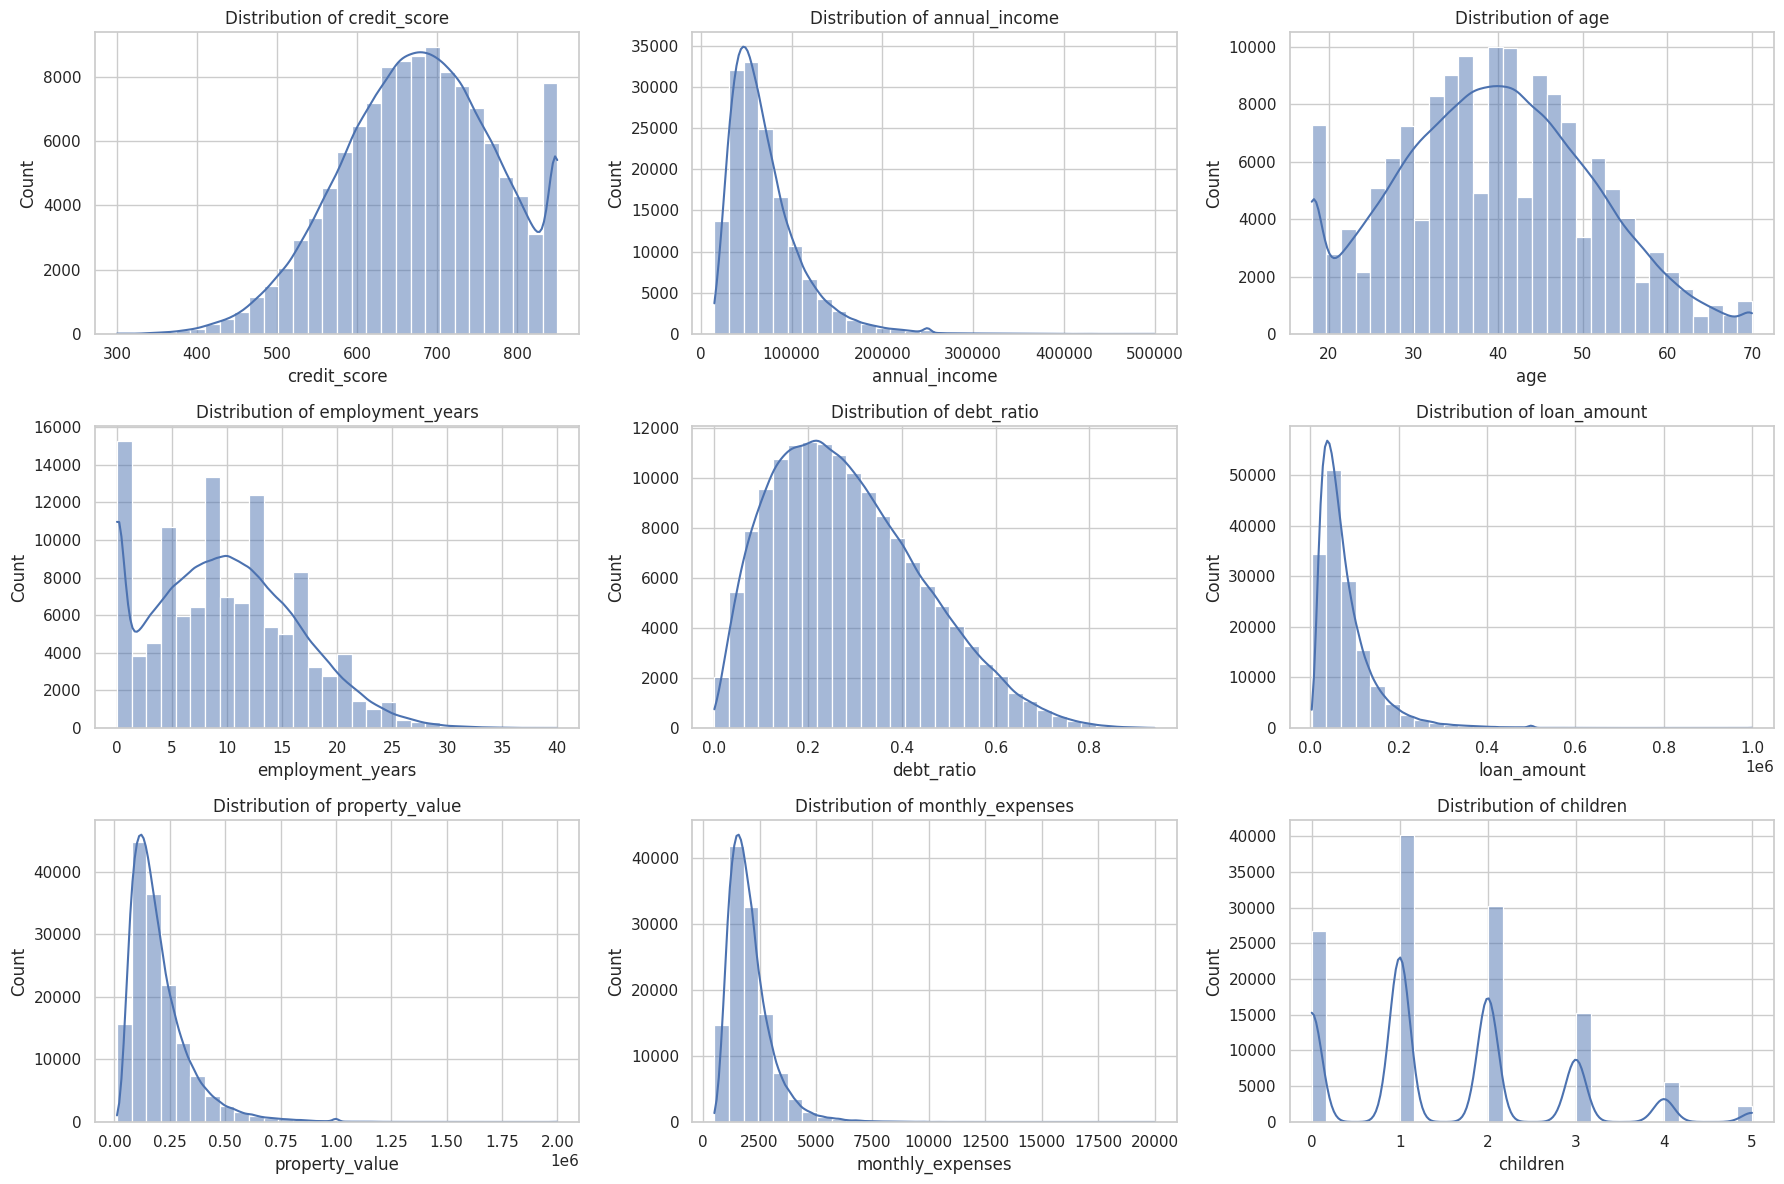

In [9]:
# Plot distributions for numerical columns
num_cols = ['credit_score', 'annual_income', 'age', 'employment_years',
            'debt_ratio', 'loan_amount', 'property_value', 'monthly_expenses', 'children']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

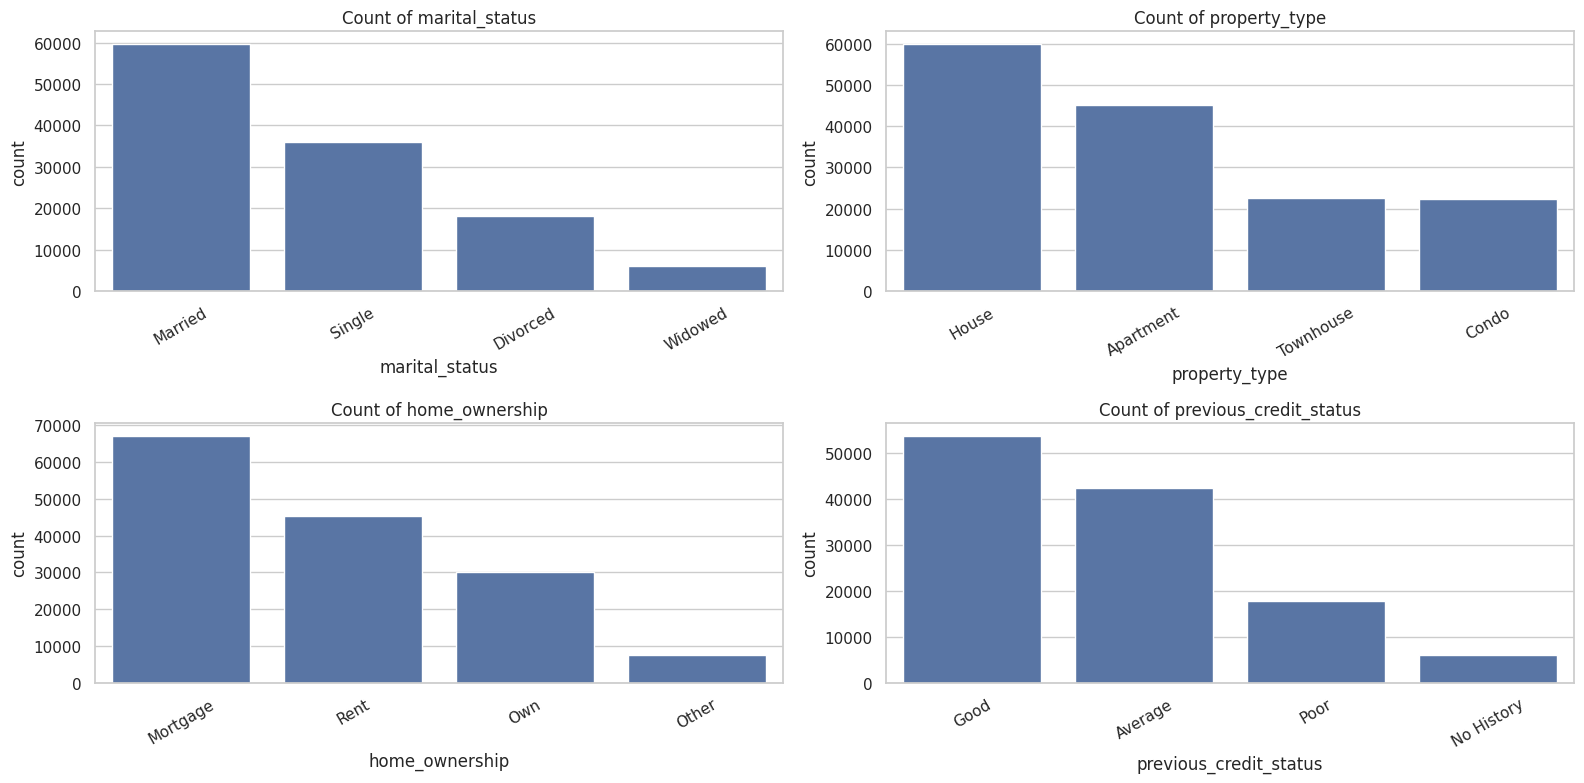

In [10]:
# Bar plots for categorical columns
cat_cols = ['marital_status', 'property_type', 'home_ownership', 'previous_credit_status']

plt.figure(figsize=(16, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


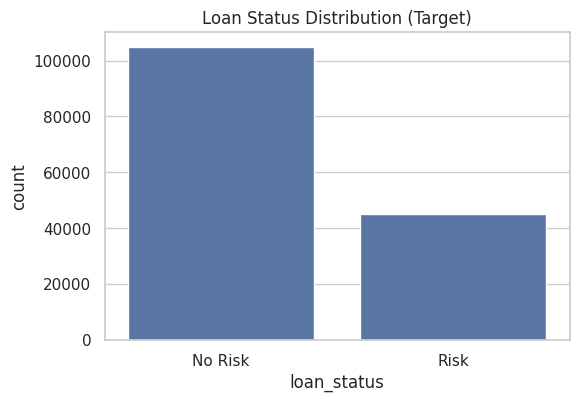

In [11]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution (Target)')
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.show()

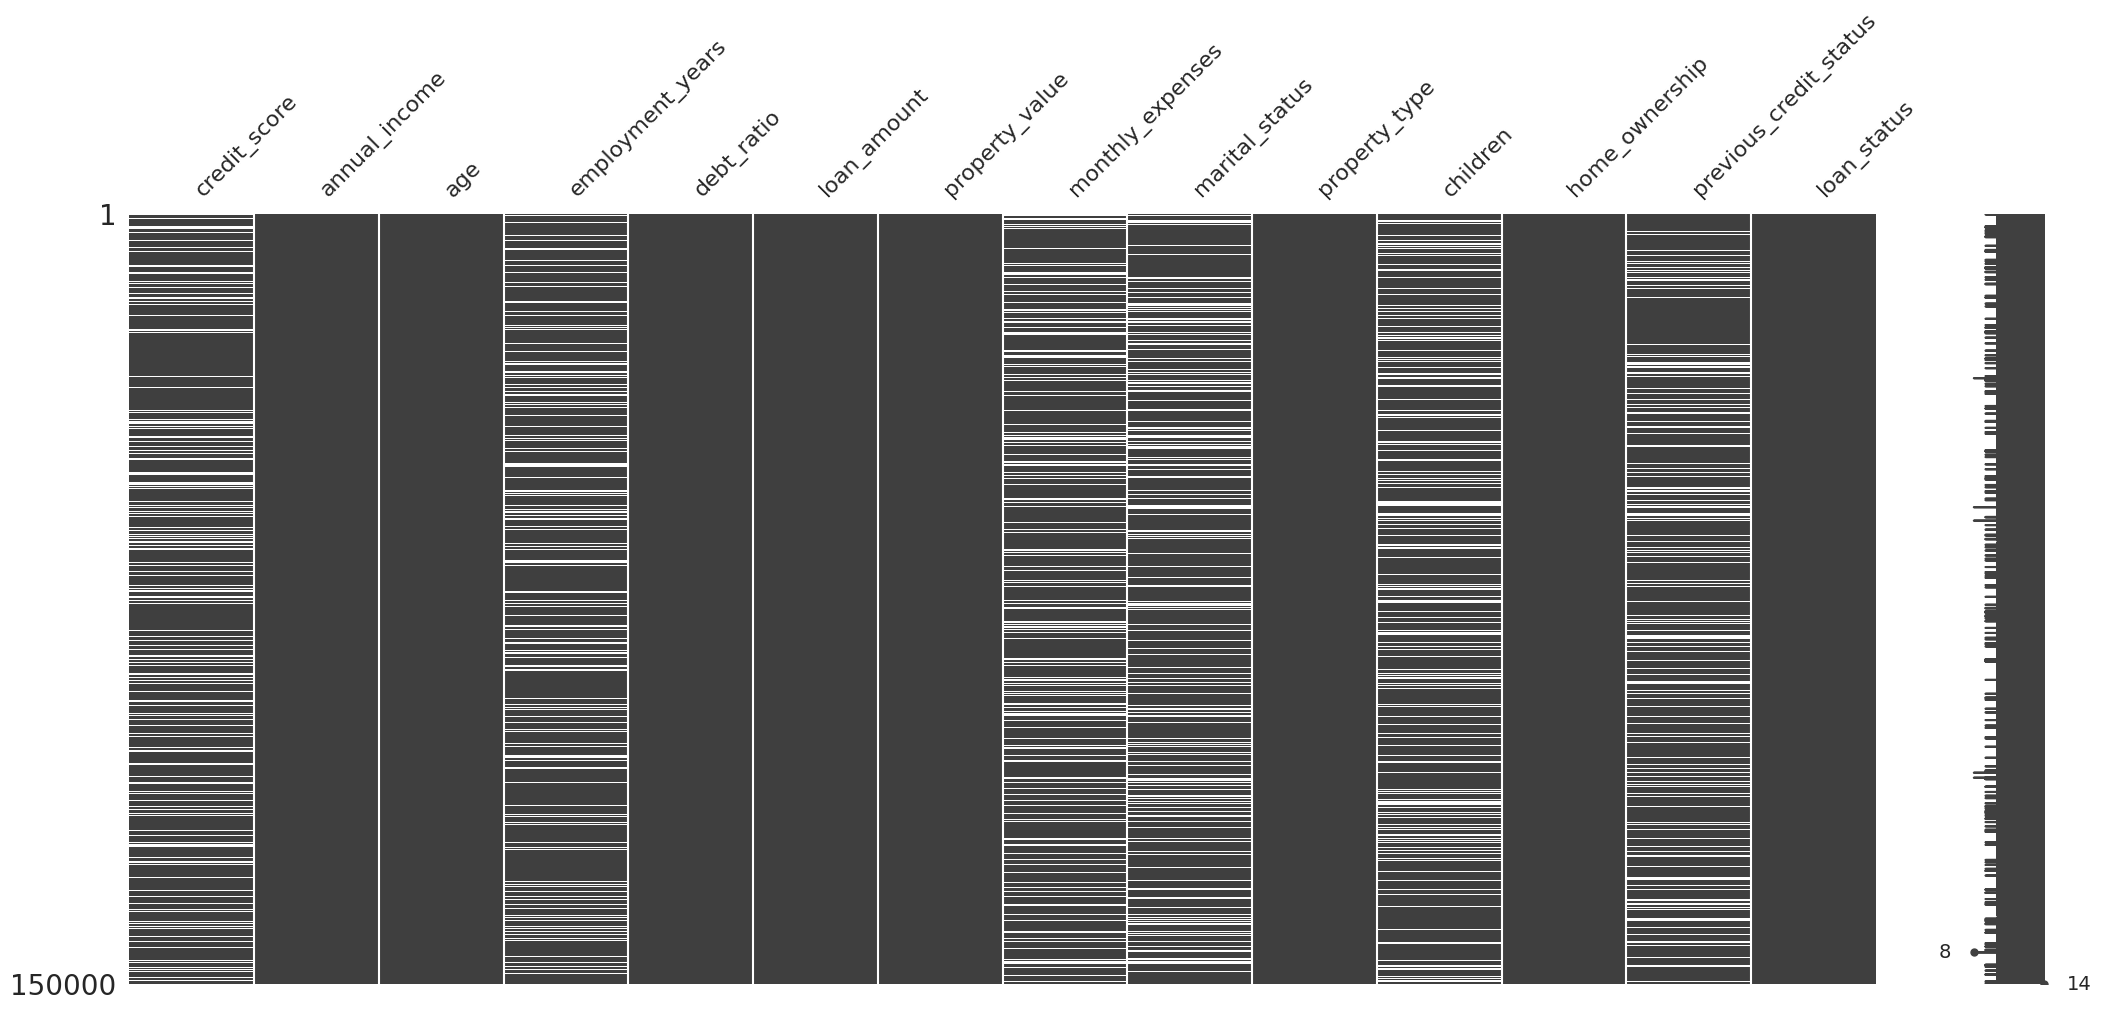

In [12]:
import missingno as msno
msno.matrix(df)
plt.show()

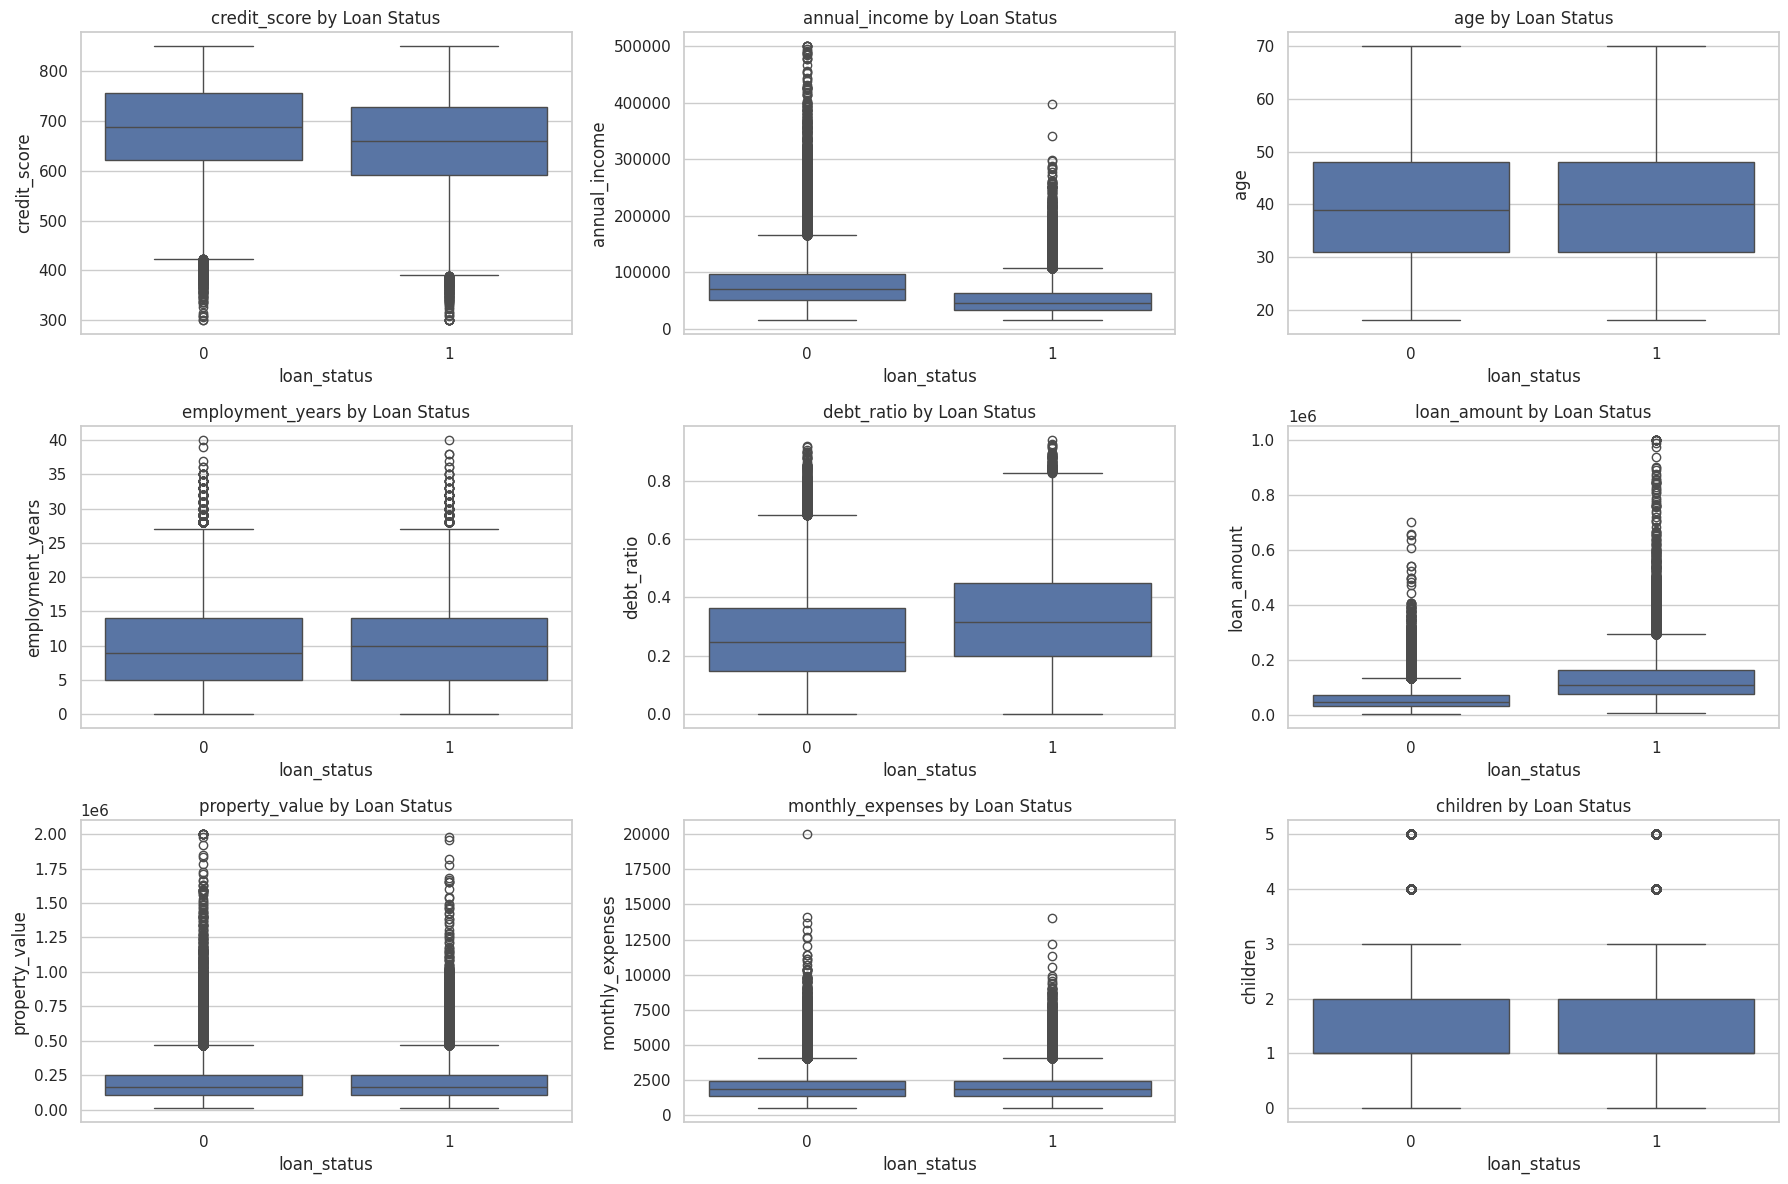

In [13]:
# Boxplots for numerical features vs. target
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} by Loan Status')
plt.tight_layout()
plt.show()

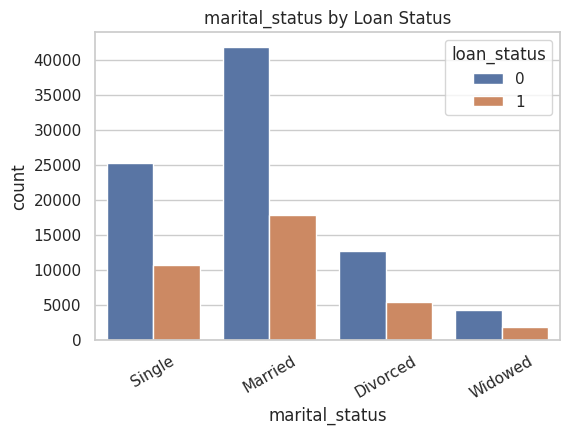

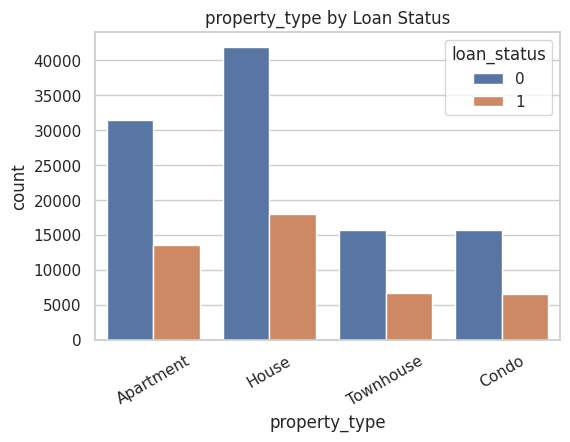

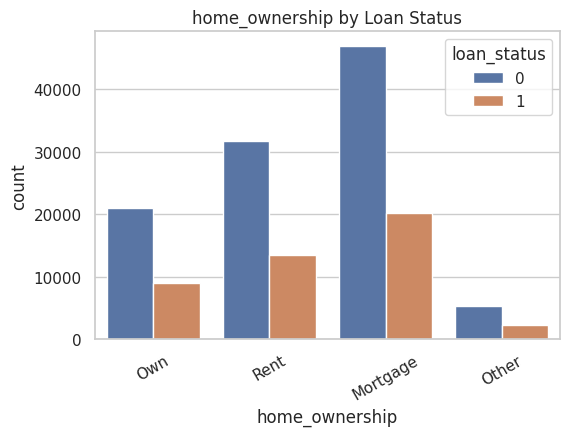

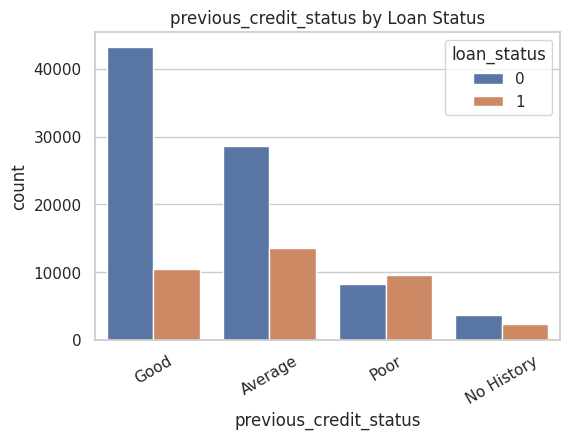

In [14]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f'{col} by Loan Status')
    plt.xticks(rotation=30)
    plt.show()

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
# --- Impute missing values ---
num_imputer = SimpleImputer(strategy='median')

In [21]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [22]:
num_cols = ['credit_score', 'employment_years', 'monthly_expenses', 'children']
cat_cols = ['marital_status', 'previous_credit_status']

In [23]:
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [24]:
df['debt_to_income'] = df['debt_ratio'] * df['annual_income']
df['loan_to_value'] = df['loan_amount'] / df['property_value']
df['is_young'] = (df['age'] < 25).astype(int)
df['is_large_loan'] = (df['loan_amount'] > df['property_value'] * 0.8).astype(int)

In [25]:
df = pd.get_dummies(df, columns=['marital_status', 'property_type', 'home_ownership', 'previous_credit_status'], drop_first=True)

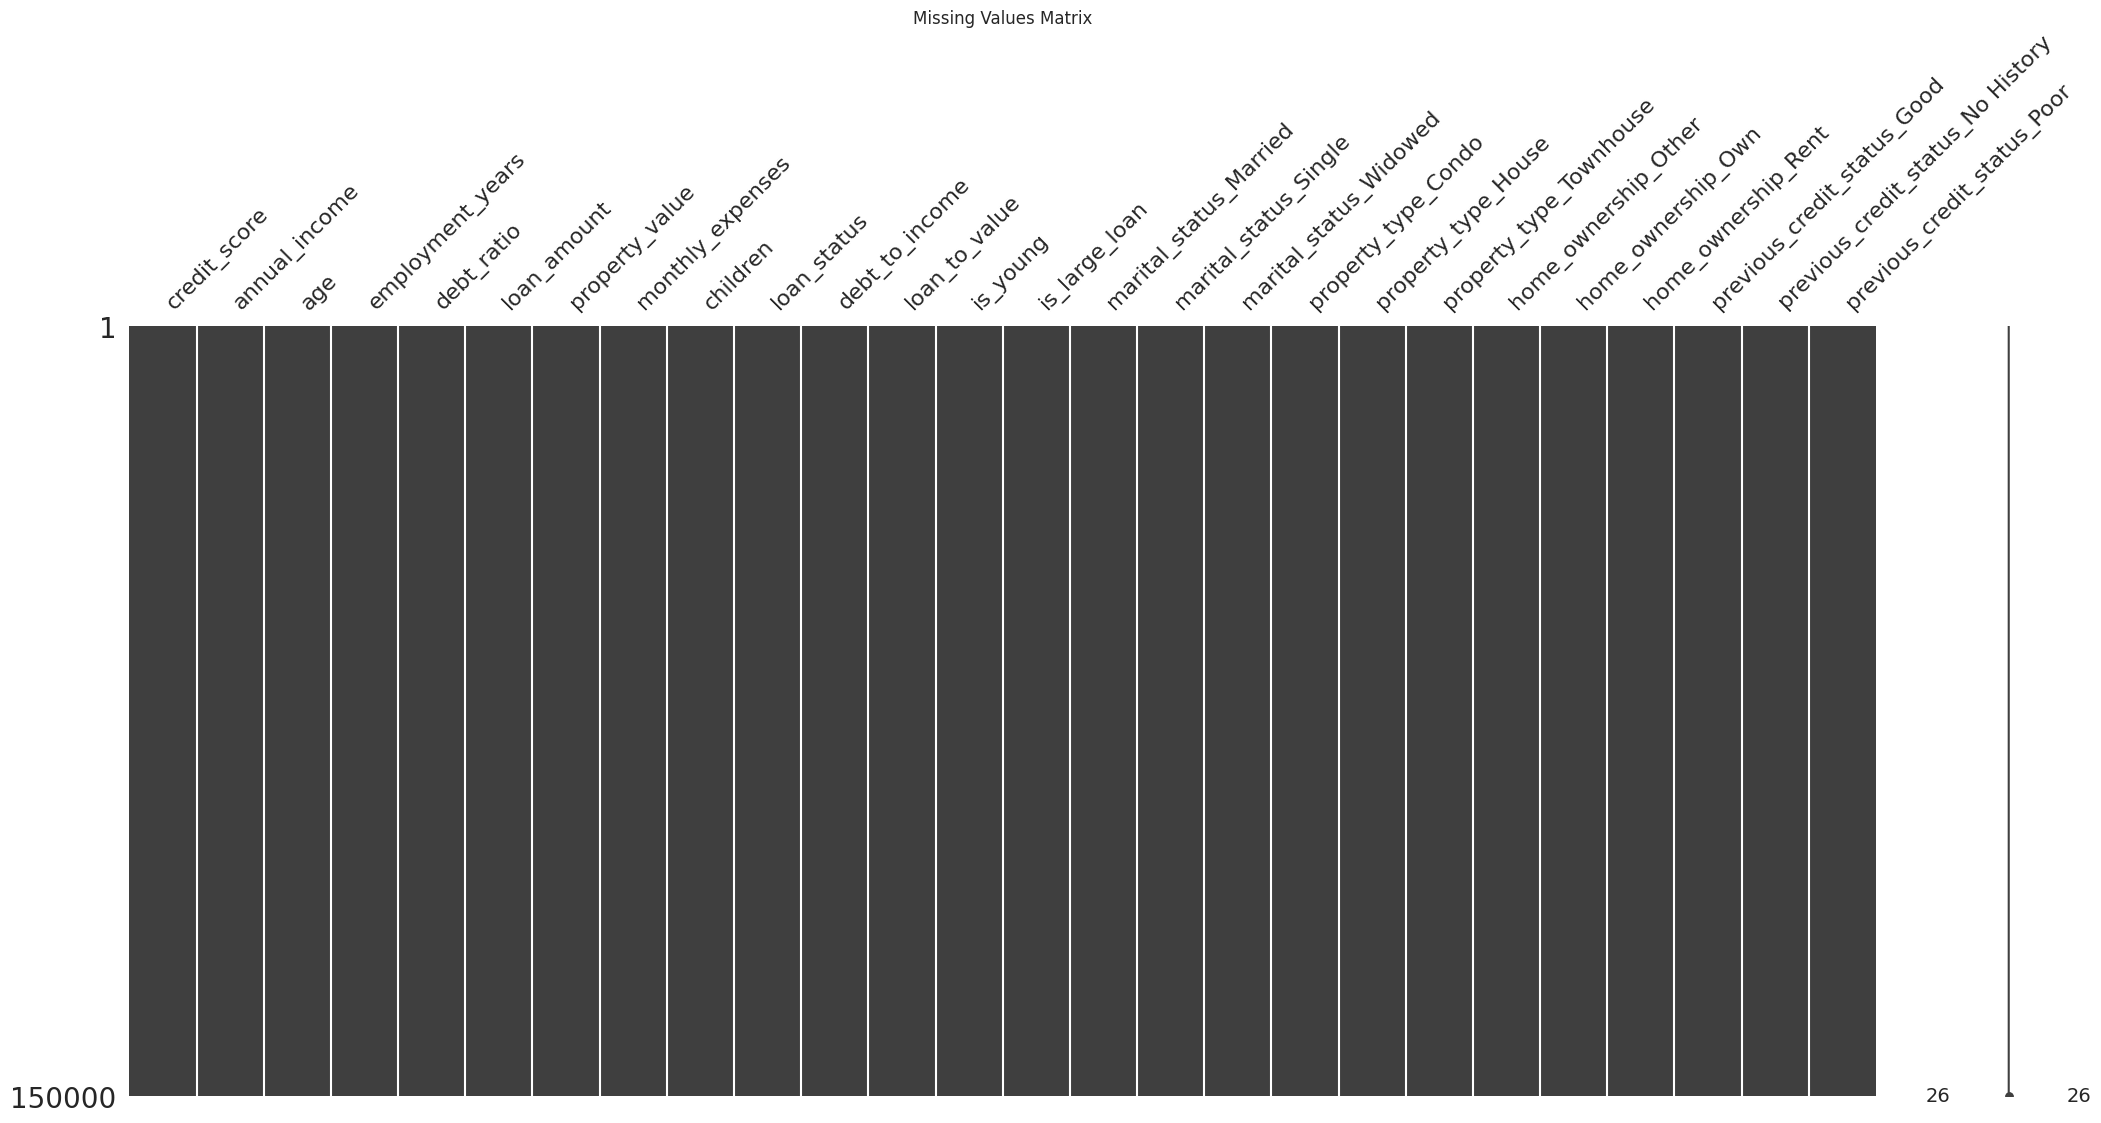

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df is your DataFrame

# 1. Missing Values Heatmap
import missingno as msno
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

<ipython-input-27-c71acd02689d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set2')


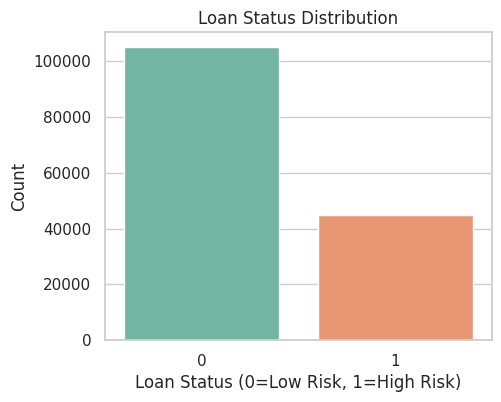

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0=Low Risk, 1=High Risk)')
plt.ylabel('Count')
plt.show()

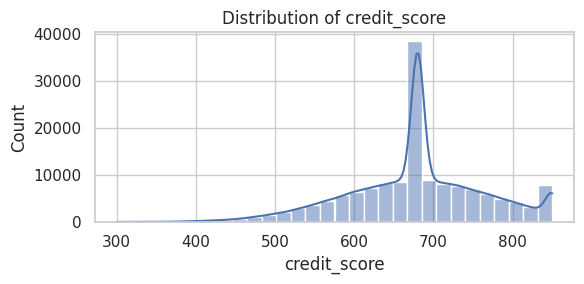

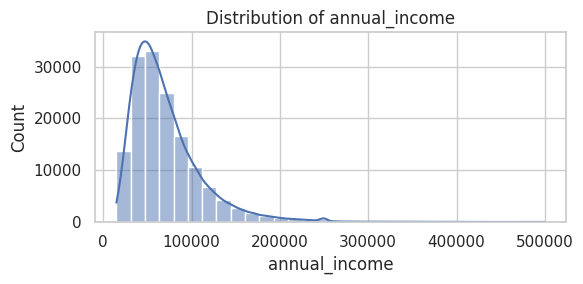

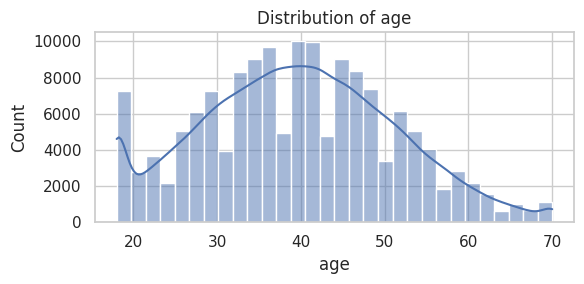

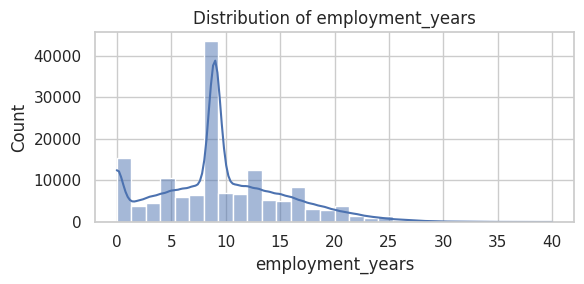

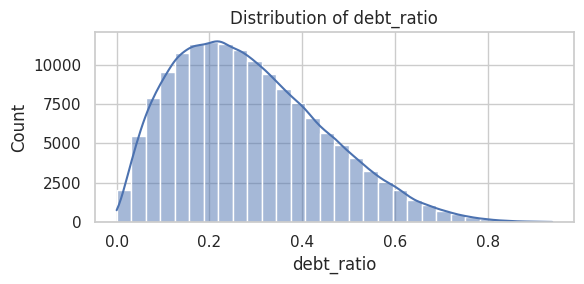

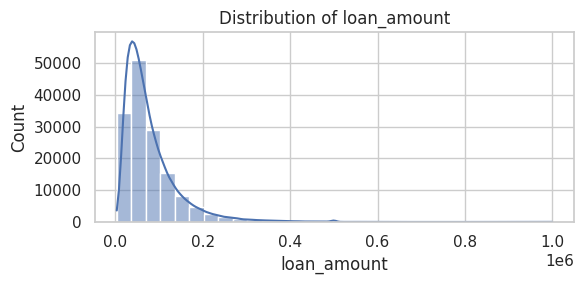

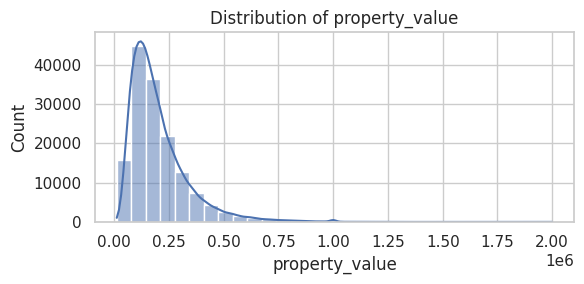

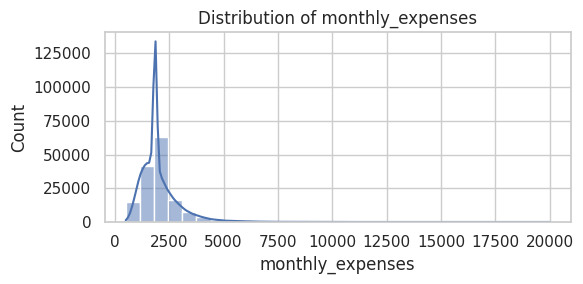

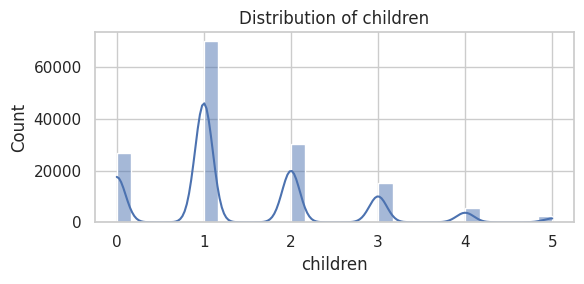

In [29]:
num_cols = ['credit_score', 'annual_income', 'age', 'employment_years',
            'debt_ratio', 'loan_amount', 'property_value', 'monthly_expenses', 'children']
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


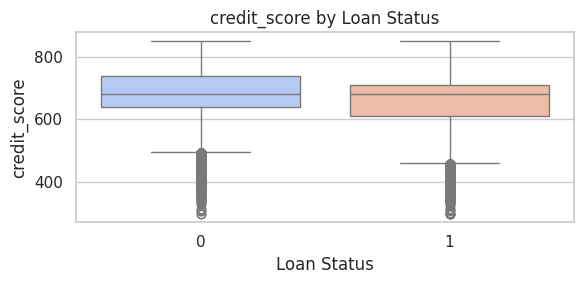

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


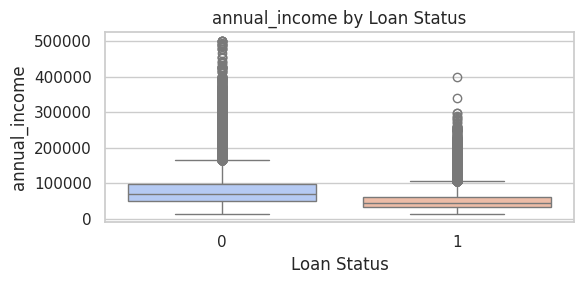

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


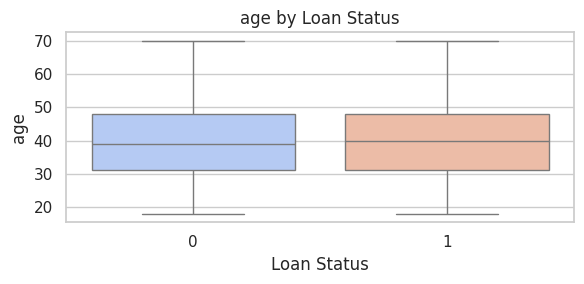

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


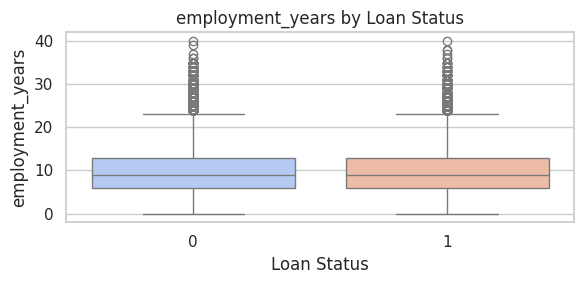

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


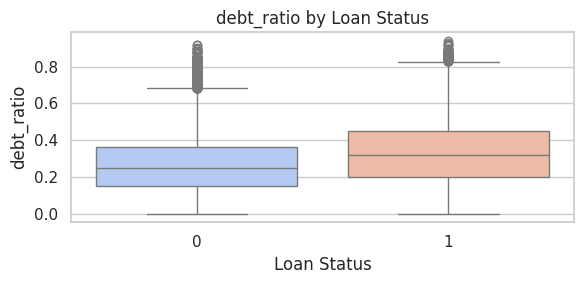

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


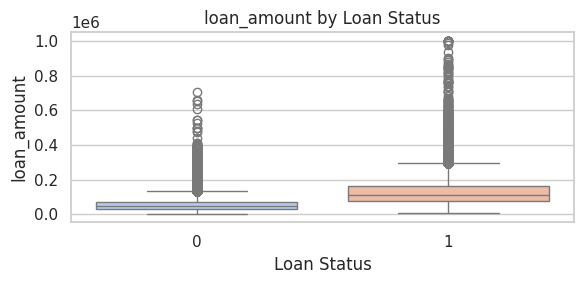

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


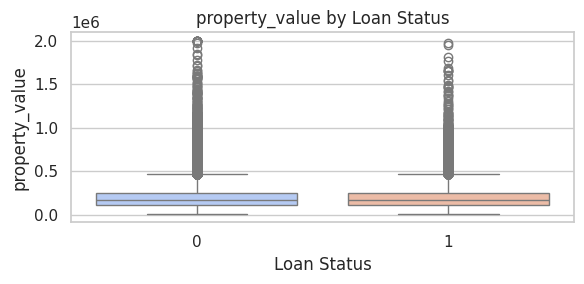

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


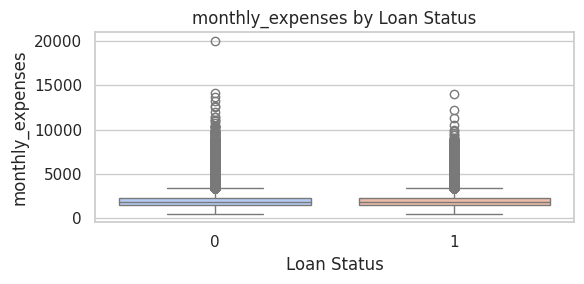

<ipython-input-30-400005a852e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


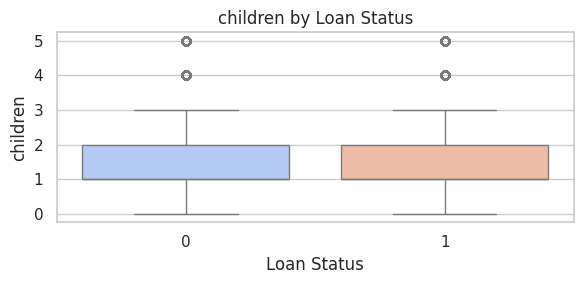

In [30]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

<ipython-input-35-b8a4a3d0917f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set2')


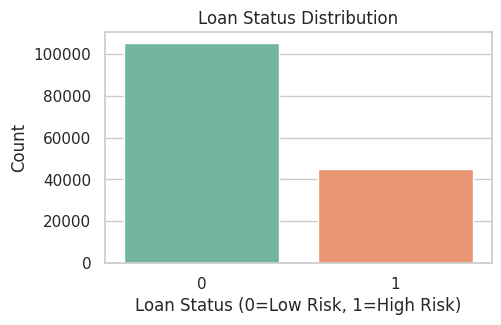

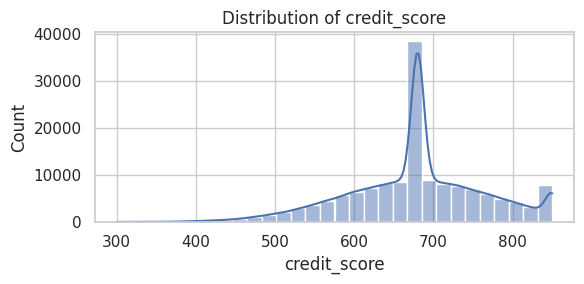

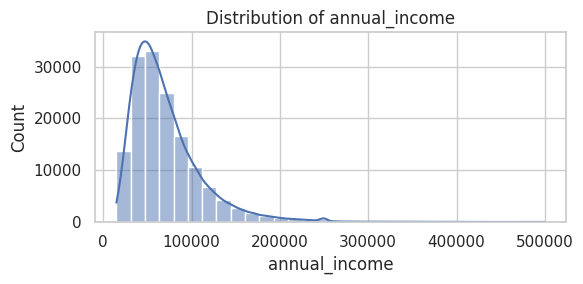

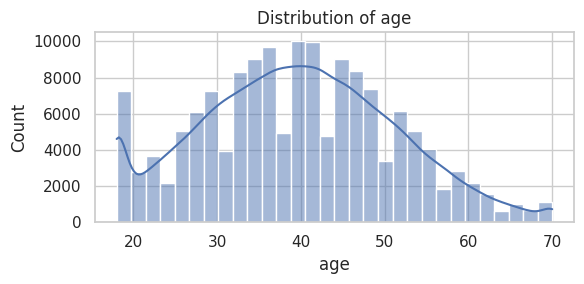

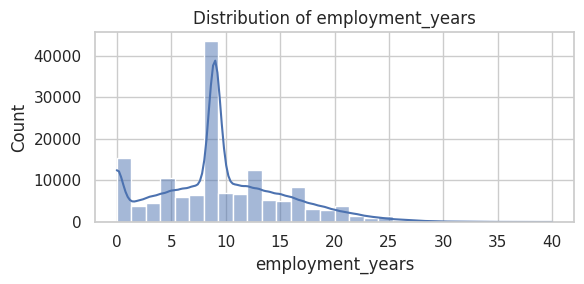

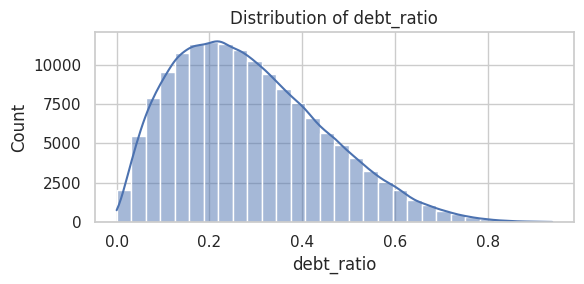

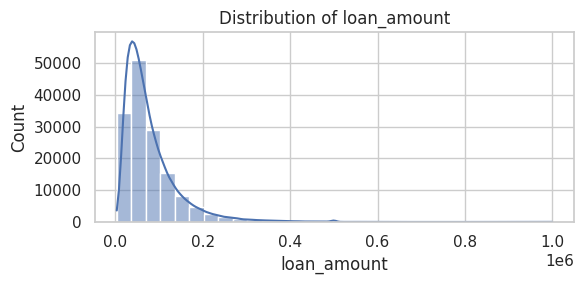

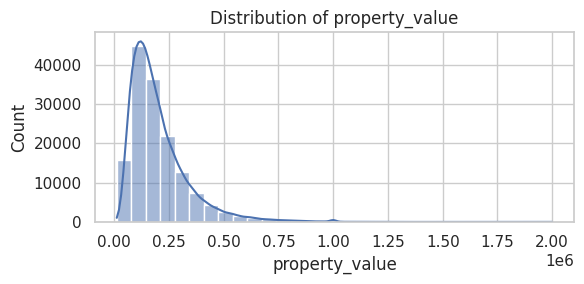

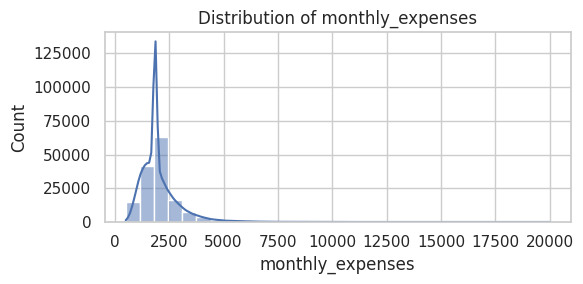

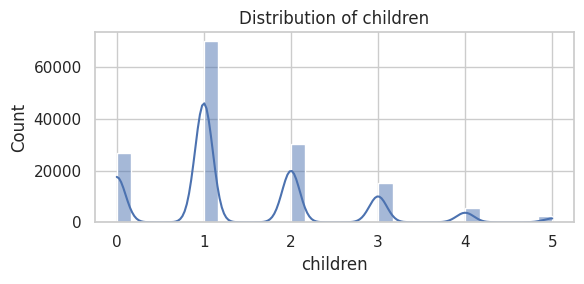

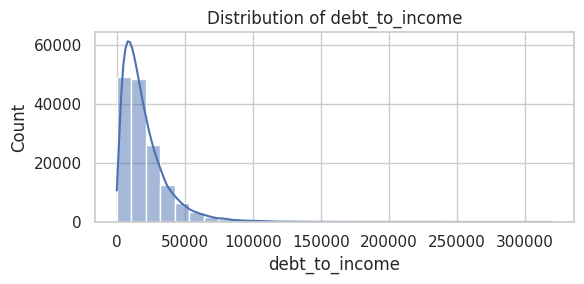

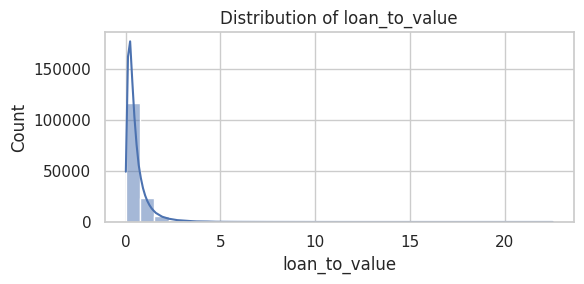

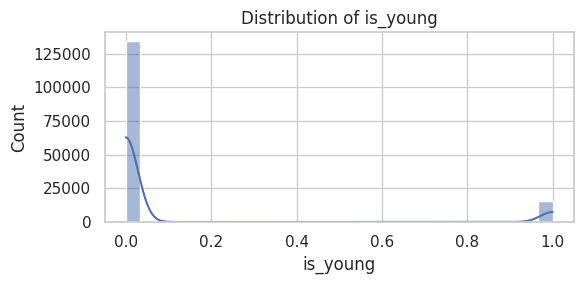

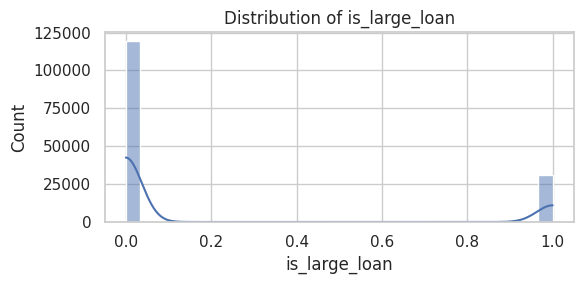

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


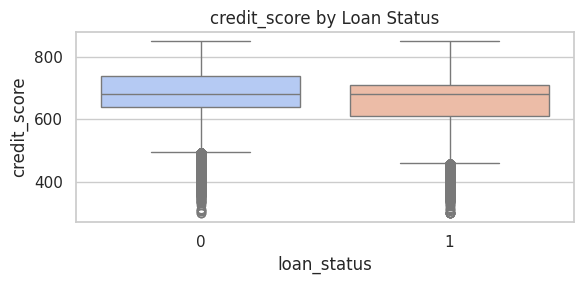

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


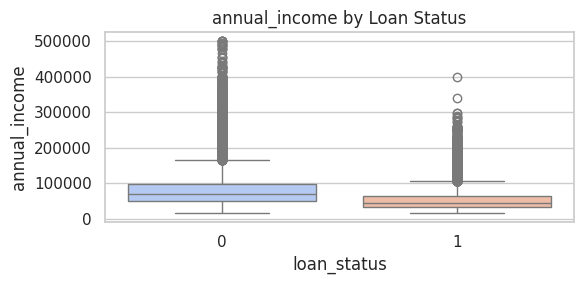

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


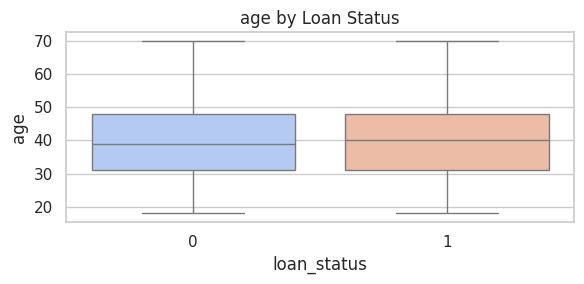

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


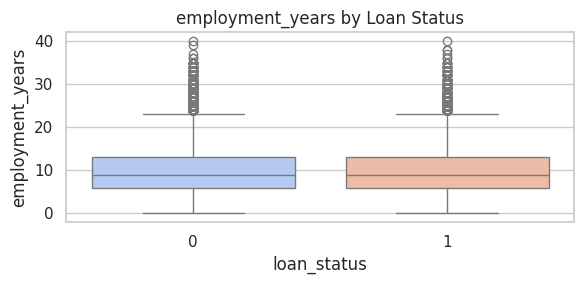

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


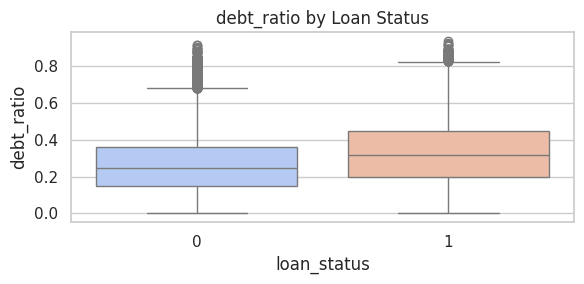

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


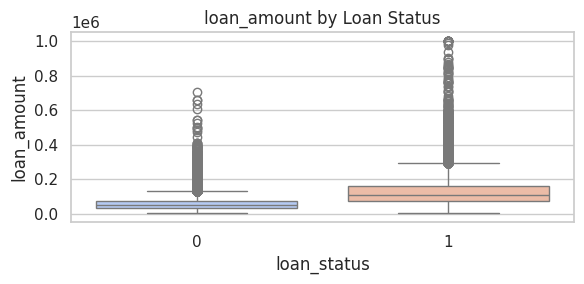

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


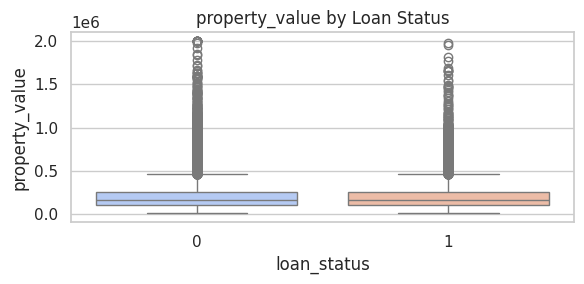

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


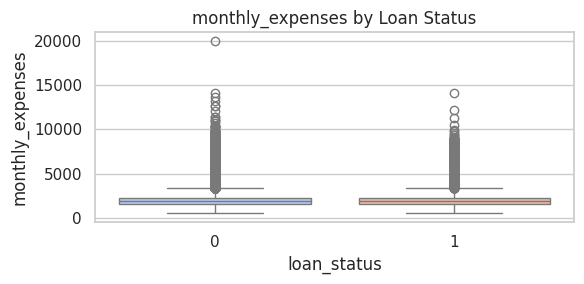

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


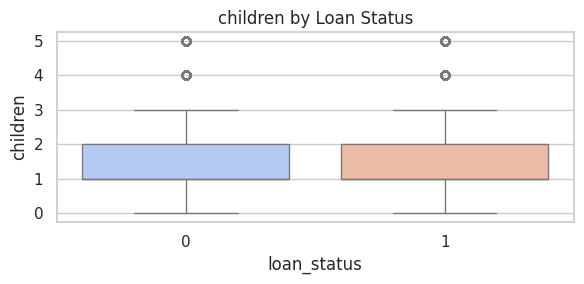

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


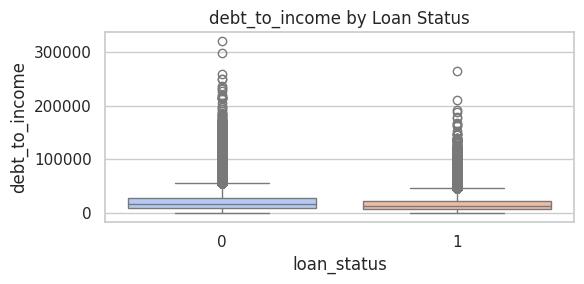

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


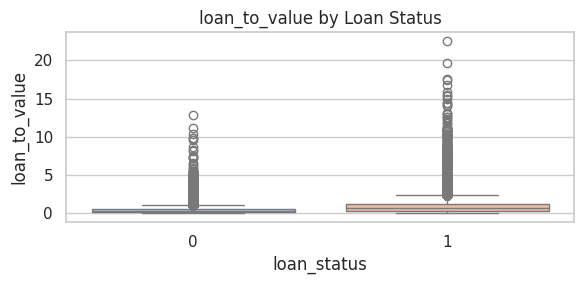

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


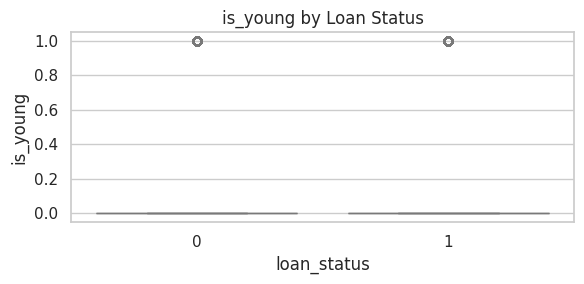

<ipython-input-35-b8a4a3d0917f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


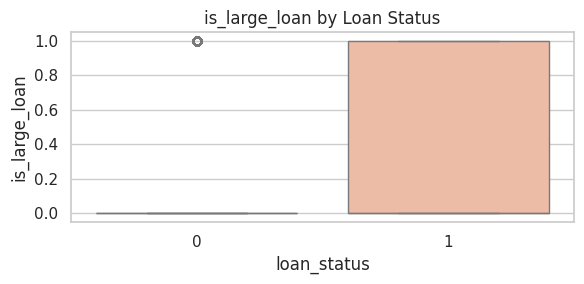

One-hot encoded feature prevalence:
                              Feature  Count        Pct
0              marital_status_Married  89950  59.966667
1               marital_status_Single  35920  23.946667
2              marital_status_Widowed   6027   4.018000
3                 property_type_Condo  22339  14.892667
4                 property_type_House  60059  40.039333
5             property_type_Townhouse  22499  14.999333
6                home_ownership_Other   7546   5.030667
7                  home_ownership_Own  30138  20.092000
8                 home_ownership_Rent  45187  30.124667
9         previous_credit_status_Good  83931  55.954000
10  previous_credit_status_No History   6074   4.049333
11        previous_credit_status_Poor  17734  11.822667
marital_status_Married: mean in loan_status=0: 0.598, mean in loan_status=1: 0.603
marital_status_Single: mean in loan_status=0: 0.240, mean in loan_status=1: 0.238
marital_status_Widowed: mean in loan_status=0: 0.040, mean in loan_stat

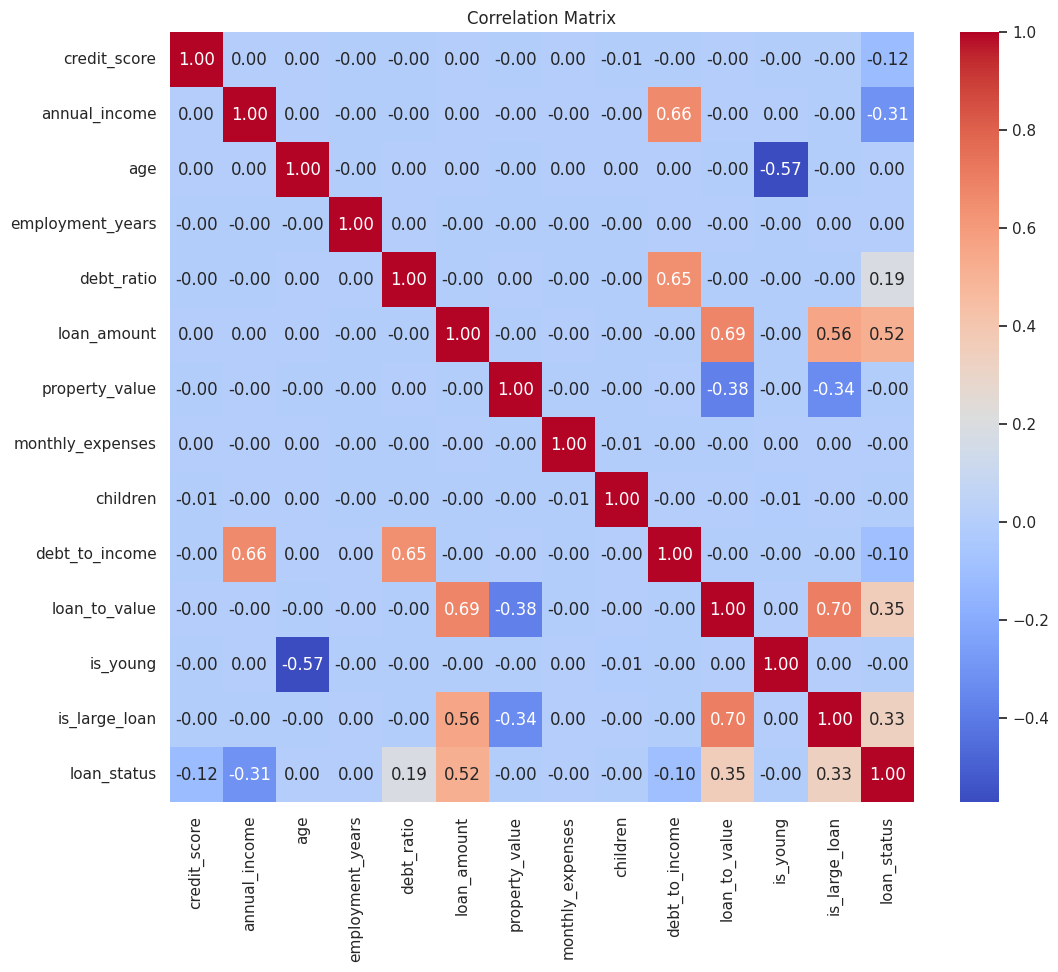

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of all columns from your query
num_cols = [
    'credit_score', 'annual_income', 'age', 'employment_years', 'debt_ratio',
    'loan_amount', 'property_value', 'monthly_expenses', 'children',
    'debt_to_income', 'loan_to_value', 'is_young', 'is_large_loan'
]

onehot_cols = [
    'marital_status_Married', 'marital_status_Single', 'marital_status_Widowed',
    'property_type_Condo', 'property_type_House', 'property_type_Townhouse',
    'home_ownership_Other', 'home_ownership_Own', 'home_ownership_Rent',
    'previous_credit_status_Good', 'previous_credit_status_No History', 'previous_credit_status_Poor'
]

# 1. Distribution of target
plt.figure(figsize=(5,3))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0=Low Risk, 1=High Risk)')
plt.ylabel('Count')
plt.show()

# 2. Numerical feature distributions
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# 3. Boxplots: Numerical features by loan_status
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} by Loan Status')
    plt.tight_layout()
    plt.show()

# 4. One-hot/categorical feature prevalence
onehot_summary = pd.DataFrame({
    'Feature': onehot_cols,
    'Count': [df[c].sum() for c in onehot_cols],
    'Pct': [df[c].mean()*100 for c in onehot_cols]
})
print("One-hot encoded feature prevalence:")
print(onehot_summary)

# 5. One-hot features by target (mean prevalence in each class)
for col in onehot_cols:
    means = df.groupby('loan_status')[col].mean()
    print(f"{col}: mean in loan_status=0: {means[0]:.3f}, mean in loan_status=1: {means[1]:.3f}")

# 6. Correlation heatmap
plt.figure(figsize=(12,10))
corr = df[num_cols + ['loan_status']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [34]:
print(df.columns.tolist())

['credit_score', 'annual_income', 'age', 'employment_years', 'debt_ratio', 'loan_amount', 'property_value', 'monthly_expenses', 'children', 'loan_status', 'debt_to_income', 'loan_to_value', 'is_young', 'is_large_loan', 'marital_status_Married', 'marital_status_Single', 'marital_status_Widowed', 'property_type_Condo', 'property_type_House', 'property_type_Townhouse', 'home_ownership_Other', 'home_ownership_Own', 'home_ownership_Rent', 'previous_credit_status_Good', 'previous_credit_status_No History', 'previous_credit_status_Poor']


Index(['credit_score', 'annual_income', 'age', 'employment_years',
       'debt_ratio', 'loan_amount', 'property_value', 'monthly_expenses',
       'children', 'loan_status', 'debt_to_income', 'loan_to_value',
       'is_young', 'is_large_loan', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed',
       'property_type_Condo', 'property_type_House', 'property_type_Townhouse',
       'home_ownership_Other', 'home_ownership_Own', 'home_ownership_Rent',
       'previous_credit_status_Good', 'previous_credit_status_No History',
       'previous_credit_status_Poor'],
      dtype='object')


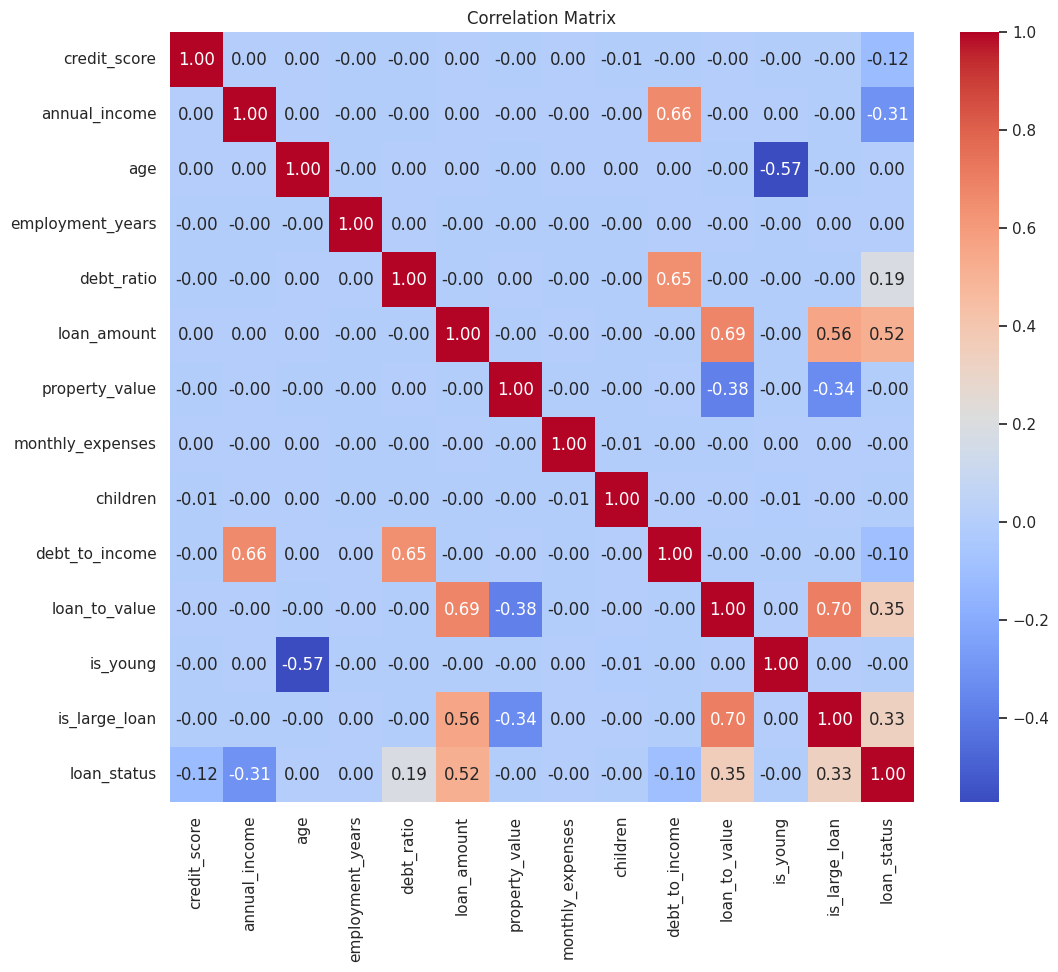

                  credit_score  annual_income       age  employment_years  \
credit_score          1.000000       0.002824  0.002787         -0.003330   
annual_income         0.002824       1.000000  0.001522         -0.000938   
age                   0.002787       0.001522  1.000000         -0.001549   
employment_years     -0.003330      -0.000938 -0.001549          1.000000   
debt_ratio           -0.003300      -0.000916  0.002555          0.003710   
loan_amount           0.000303       0.001400  0.000345         -0.001246   
property_value       -0.002851      -0.000364 -0.000955         -0.002410   
monthly_expenses      0.000620      -0.000137  0.000550         -0.004184   
children             -0.005578      -0.000639  0.002779         -0.002223   
debt_to_income       -0.001214       0.664810  0.002627          0.003362   
loan_to_value        -0.000195      -0.000432 -0.002240         -0.000859   
is_young             -0.001308       0.000382 -0.571922         -0.002988   

In [36]:
# Check available columns
print(df.columns)

# Filter only the existing columns
existing_cols = [col for col in (num_cols + ['loan_status']) if col in df.columns]

# Now calculate correlation
plt.figure(figsize=(12,10))
corr = df[existing_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(corr)

In [38]:
# Compute correlation
corr = df[existing_cols].corr()

# Display as table with background color and 2 decimal points
corr.style.background_gradient(cmap='coolwarm').format(precision=2)


In [39]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Prepare features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [40]:
# 2. Train-test split (stratify to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
# 3. Initial XGBoost model training
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:20:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [42]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

In [43]:
print("Initial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Initial Model Performance:
Accuracy: 0.9321
F1 Score: 0.8857
Precision: 0.8954
Recall: 0.8761
ROC-AUC: 0.9735
R2 Score: 0.6768

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     21000
           1       0.90      0.88      0.89      9000

    accuracy                           0.93     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.93      0.93      0.93     30000

Confusion Matrix:
 [[20079   921]
 [ 1115  7885]]


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=  12.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:37:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   8.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   8.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:50:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:51:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:52:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:20:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:20:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:20:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:20:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   8.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:20:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:20:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=  10.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:20:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=  10.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:39:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   8.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   8.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   7.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   8.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   8.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   6.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   8.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:02:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:02:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:02:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:02:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:02:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=  10.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:02:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:02:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=  10.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=  10.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=  10.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   6.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  10.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   7.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   8.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=  10.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   7.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   8.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=  10.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=  11.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   7.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   9.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.8; total time=   8.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=1.0; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.8; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   8.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=1.0; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 10, 'reg_lambda': 10, 'subsample': 1.0}

Best Model Performance:
Accuracy: 0.9376
F1 Score: 0.8947
Precision: 0.9061
Recall: 0.8836
ROC-AUC: 0.9745
R2 Score: 0.7029

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     21000
           1       0.91      0.88      0.89      9000

    accuracy                           0.94     30000
   macro avg       0.93      0.92      0.93     30000
weighted avg       0.94      0.94      0.94     30000

Confusion Matrix:
 [[20176   824]
 [ 1048  7952]]


<Figure size 1000x600 with 0 Axes>

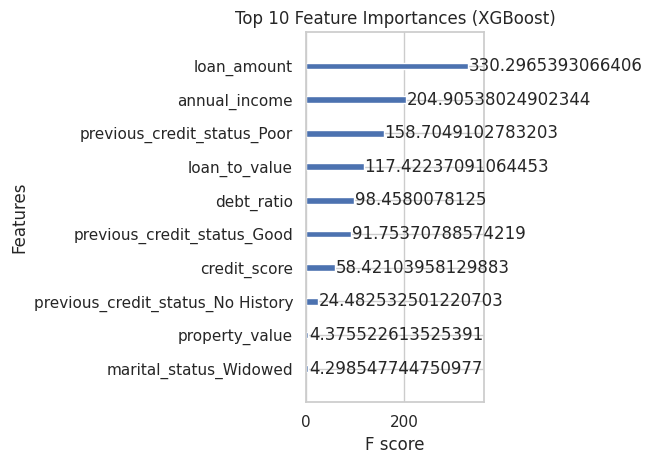

In [44]:
# 5. Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 1, 10],
    'reg_lambda': [1, 10]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

print("\nBest Hyperparameters:", grid_search.best_params_)

# 6. Evaluate best model
y_pred_best = best_xgb.predict(X_test)
y_pred_best_proba = best_xgb.predict_proba(X_test)[:, 1]

print("\nBest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_best_proba):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# 7. Feature Importance Plot
plt.figure(figsize=(10, 6))
from xgboost import plot_importance
plot_importance(best_xgb, max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

In [46]:
import joblib

# Save the best model to a file
joblib.dump(best_xgb, 'best_xgb_model.pkl')

print("Best XGBoost model saved successfully as 'best_xgb_model.pkl'")


Best XGBoost model saved successfully as 'best_xgb_model.pkl'


In [48]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00


In [52]:
import joblib

# Save the model
joblib.dump(best_xgb, 'best_xgb_model.joblib')

# Load the model later
loaded_model = joblib.load('best_xgb_model.joblib')

In [53]:
best_xgb = joblib.load('best_xgb_model.joblib')


In [55]:
best_xgb.feature_names_in_

array(['credit_score', 'annual_income', 'age', 'employment_years',
       'debt_ratio', 'loan_amount', 'property_value', 'monthly_expenses',
       'children', 'debt_to_income', 'loan_to_value', 'is_young',
       'is_large_loan', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Widowed', 'property_type_Condo',
       'property_type_House', 'property_type_Townhouse',
       'home_ownership_Other', 'home_ownership_Own',
       'home_ownership_Rent', 'previous_credit_status_Good',
       'previous_credit_status_No History', 'previous_credit_status_Poor'],
      dtype='<U33')

In [56]:
import gradio as gr
import pandas as pd

def predict_risk(
    credit_score, annual_income, age, employment_years,
    debt_ratio, loan_amount, property_value, monthly_expenses,
    children, debt_to_income, loan_to_value,
    is_young, is_large_loan,
    marital_status_Married, marital_status_Single, marital_status_Widowed,
    property_type_Condo, property_type_House, property_type_Townhouse,
    home_ownership_Other, home_ownership_Own, home_ownership_Rent,
    previous_credit_status_Good, previous_credit_status_No_History, previous_credit_status_Poor
):
    input_data = pd.DataFrame({
        'credit_score': [credit_score],
        'annual_income': [annual_income],
        'age': [age],
        'employment_years': [employment_years],
        'debt_ratio': [debt_ratio],
        'loan_amount': [loan_amount],
        'property_value': [property_value],
        'monthly_expenses': [monthly_expenses],
        'children': [children],
        'debt_to_income': [debt_to_income],
        'loan_to_value': [loan_to_value],
        'is_young': [int(is_young)],
        'is_large_loan': [int(is_large_loan)],
        'marital_status_Married': [int(marital_status_Married)],
        'marital_status_Single': [int(marital_status_Single)],
        'marital_status_Widowed': [int(marital_status_Widowed)],
        'property_type_Condo': [int(property_type_Condo)],
        'property_type_House': [int(property_type_House)],
        'property_type_Townhouse': [int(property_type_Townhouse)],
        'home_ownership_Other': [int(home_ownership_Other)],
        'home_ownership_Own': [int(home_ownership_Own)],
        'home_ownership_Rent': [int(home_ownership_Rent)],
        'previous_credit_status_Good': [int(previous_credit_status_Good)],
        'previous_credit_status_No History': [int(previous_credit_status_No_History)],
        'previous_credit_status_Poor': [int(previous_credit_status_Poor)],
    })

    prediction = model.predict(input_data)
    return "High Risk 🚨" if prediction[0] == 1 else "Low Risk ✅"

# Build Gradio interface
iface = gr.Interface(
    fn=predict_risk,
    inputs=[
        gr.Slider(300, 850, step=1, label="Credit Score"),
        gr.Number(label="Annual Income"),
        gr.Number(label="Age"),
        gr.Number(label="Employment Years"),
        gr.Number(label="Debt Ratio"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Property Value"),
        gr.Number(label="Monthly Expenses"),
        gr.Number(label="Number of Children"),
        gr.Number(label="Debt-to-Income Ratio"),
        gr.Number(label="Loan-to-Value Ratio"),
        gr.Checkbox(label="Is Young (Age < 25)"),
        gr.Checkbox(label="Is Large Loan (Loan > Income)"),
        gr.Checkbox(label="Married"),
        gr.Checkbox(label="Single"),
        gr.Checkbox(label="Widowed"),
        gr.Checkbox(label="Property: Condo"),
        gr.Checkbox(label="Property: House"),
        gr.Checkbox(label="Property: Townhouse"),
        gr.Checkbox(label="Home Ownership: Other"),
        gr.Checkbox(label="Home Ownership: Own"),
        gr.Checkbox(label="Home Ownership: Rent"),
        gr.Checkbox(label="Previous Credit Status: Good"),
        gr.Checkbox(label="Previous Credit Status: No History"),
        gr.Checkbox(label="Previous Credit Status: Poor"),
    ],
    outputs="text",
    title="Credit Risk Prediction App 🚀",
    description="Fill the customer details to predict risk."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8d3ad7c4a3935c681a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [57]:
print("Training data shape:", X_train.shape)


Training data shape: (120000, 25)


In [59]:
import gradio as gr
import numpy as np
import pandas as pd

# Define the prediction function (using only 5 features)
def predict(*inputs):
    # Convert inputs into a numpy array and reshape it for one sample (1, 5)
    inputs_array = np.array(inputs).reshape(1, -1)

    # Convert to DataFrame to match the input format used during training
    # Assuming we're using the first 5 features for prediction (adjust columns accordingly)
    inputs_df = pd.DataFrame(inputs_array, columns=[f"feature_{i}" for i in range(1, 6)])  # Replace with actual column names if available

    # Predict using the trained model (ensure the model can accept these 5 features)
    prediction = best_xgb_loaded.predict(inputs_df)
    return prediction[0]  # Return the predicted value

# Launch the Gradio interface with 5 input fields (Textbox)
gr.Interface(fn=predict, inputs=[gr.Textbox() for _ in range(5)], outputs="text").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bb8629730773a1813b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [62]:
df.to_csv('/content/sample_data/CreditDataJPMorgan_cleaned.csv', index=False)

# Verify that it was saved correctly
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [63]:
import pandas as pd

# Load your dataset (replace with your actual file path)
data = pd.read_csv('/content/sample_data/CreditDataJPMorgan_cleaned.csv')

# Check the first few rows to ensure the data is loaded correctly
print(data.head())


   credit_score  annual_income  age  employment_years  debt_ratio  \
0         729.0      118769.39   23               9.0      0.3188   
1         680.0       56719.17   46               9.0      0.1646   
2         744.0       34837.74   38               9.0      0.0907   
3         832.0      120088.04   36               8.0      0.3044   
4         656.0       56580.04   49               8.0      0.2294   

   loan_amount  property_value  monthly_expenses  children  loan_status  ...  \
0     30434.54       129876.89          2312.290       2.0            0  ...   
1     12362.16        47440.30          1853.575       1.0            0  ...   
2     25163.51       187685.12          1853.575       1.0            0  ...   
3     80698.16        84470.09          2510.770       1.0            0  ...   
4     80526.61       111199.52          1853.575       1.0            0  ...   

   marital_status_Widowed  property_type_Condo  property_type_House  \
0                   False        

In [65]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you've loaded the dataset 'data' (ensure it's loaded as shown above)
# Select the 5 most important features
selected_features = [
    "loan_amount", "annual_income", "loan_to_value", "debt_ratio", "credit_score"
]

# Select features and target variable
X = data[selected_features]  # Features
y = data['loan_status']  # Replace 'target' with your actual target column name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Save the trained model to a file
import joblib
joblib.dump(model, 'xgb_model_5_features.pkl')

# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:14:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8867
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     20995
           1       0.84      0.77      0.80      9005

    accuracy                           0.89     30000
   macro avg       0.87      0.85      0.86     30000
weighted avg       0.89      0.89      0.89     30000



In [68]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load('xgb_model_5_features.pkl')

# Define the prediction function
def predict(loan_amount, annual_income, loan_to_value, debt_ratio, credit_score):
    # Create a DataFrame from the inputs
    inputs = np.array([loan_amount, annual_income, loan_to_value, debt_ratio, credit_score]).reshape(1, -1)
    inputs_df = pd.DataFrame(inputs, columns=["loan_amount", "annual_income", "loan_to_value", "debt_ratio", "credit_score"])

    # Predict using the trained model
    prediction = model.predict(inputs_df)

    # Check the predicted class
    if prediction[0] == 1:  # If the model predicts 1, it's "Denied"
        return "Denied"
    else:  # If the model predicts 0, it's "Approved"
        return "Approved"

# Define the Gradio interface
gr.Interface(
    fn=predict,
    inputs=[
        gr.Slider(minimum=0, maximum=100000, label="Loan Amount", step=100),  # Adjust max value accordingly
        gr.Slider(minimum=0, maximum=1000000, label="Annual Income", step=1000),  # Adjust max value accordingly
        gr.Slider(minimum=0, maximum=1, label="Loan-to-Value Ratio", step=0.01),  # Adjust max value accordingly
        gr.Slider(minimum=0, maximum=1, label="Debt Ratio", step=0.01),  # Adjust max value accordingly
        gr.Slider(minimum=0, maximum=850, label="Credit Score", step=1)  # Adjust max value accordingly
    ],
    outputs="text"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8a95e0eaea43a26037.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [69]:
from google.colab import files
import joblib

# Save the model to a file
model_filename = "xgb_model_5_features.pkl"
joblib.dump(model, model_filename)

# Download the model file
files.download(model_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>